In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problem 1e

In order to perform an integral numerically, we are approximating:

$$y(b) - y(a) = \int_a^b f(x)dx = \int_a^b \frac{dy}{dx}(x)dx$$

Note that we are solving for a velocity increment, or difference which is precisely the
left-hand side of the equation above.

We can approximate its solution simply using the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule):

$$\int_a^b f(x)dx = \frac{\Delta x}{2}\left[f(a) + 2 \sum_{k=1}^{N-1}f(x_k) + f(b)\right]$$

In [2]:
def integrate_trap(f, a, b, args=None, N=100):
    '''
    Uses trapezoidol rule to approximate
    integrate of f(x) from a to b
    '''
    delta_x = (b-a) / float(N)
    xk = np.linspace(a + delta_x, b - delta_x, N-1)
    return delta_x / 2. * (f(a, *args) + 2 * np.sum(f(xk, *args)) + f(b, *args))

Let's try this out with the rocket equation.  The rocket equation was originally derived from conservation of momentum which states that:

$$m_r dU_r = U_e \frac{dm}{m}$$

We know the solution to this is

$$\Delta U_r = U_e \ln{\frac{m_0}{m_f}}$$

Let's compare this with numerical solution.

In [3]:
def f_rocket_equation(m, Ue):
    return Ue / m

Ue = 10.
m0 = 10.
mf = 1.

deltaU_r_analytical = Ue * np.log(m0 / mf)

deltaU_r_numerical = integrate_trap(f_rocket_equation, mf, m0, args=(Ue,))

print 'Analytic results: %.3f m/s' % deltaU_r_analytical
print 'Numerical results: %.3f m/s' % deltaU_r_numerical

Analytic results: 23.026 m/s
Numerical results: 23.033 m/s


Pretty close!

Now let's look at something a bit closer to the problem you are asked to solve.

If we presume that $\beta = \frac{m_f}{m_0}$ how does $\Delta V$ vary with $\beta$?

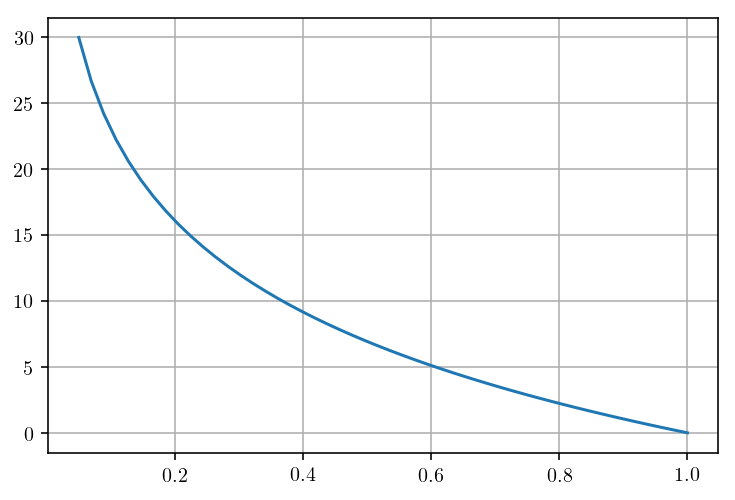

In [4]:
betav = np.linspace(0.05, 1)
deltaU_v = np.zeros_like(betav)

for i, b in enumerate(betav):
    deltaU_v[i] = integrate_trap(f_rocket_equation, b, 1, args=(Ue,))
    
plt.plot(betav, deltaU_v)